In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

###### The data set contains information and metrics for commercial domestic (USA) airline flights that departed from 2 separate airports located in Houston, TX (IAH and HOU) during the 2011 calendar year.

- Year, Month, DayofMonth: date of departure 出发日期
- DayOfWeek: day of week of departure (useful for removing weekend effects) 出发的星期第几日(适用于取消周末效果)
- DepTime: departure time (in local time, hhmm) 起飞时间
- ArrTime: arrival time (in local time, hhmm) 到达时间
- UniqueCarrier: unique abbreviation for a carrier 承运人的唯一缩写
- FlightNum: flight number 航班号
- TailNum: airplane tail number 飞机尾数
- ActualElapsedTime: elapsed time of flight, in minutes 飞行经过的时间，以分钟为单位
- AirTime: flight time, in minutes 飞行时间，以分钟为单位
- ArrDelay: arrival delay, in minutes, 到达延迟，以分钟为单位
- DepDelay: departure delay, in minutes 起飞延误，以分钟为单位
- Origin: origin airport code 起飞机场代码
- Dest: destination airport code 目的地机场代码
- Distance: distance of flight, in miles 飞行距离，单位为英里
- TaxiIn: taxi in time in minutes 几分钟滑入
- TaxiOut: taxi out time in minutes 几分钟滑出
- Cancelled: cancelled indicator: 1 = Yes, 0 = No  取消
- CancellationCode: reason for cancellation: A = carrier, B = weather, C = national air system, D = security 取消原因:A =承运人，B =天气，C =国家航空系统，D =安全
- Diverted: diverted indicator: 1 = Yes, 0 = No 转移指示

In [2]:
"""
to read the hflights and get the DataFrame . 
"""

filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
hflights_df = pd.read_csv(filename)

In [3]:
"""
Show the 5 rows
"""
hflights_df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [4]:
# show the columns
flt_col_names = hflights_df.columns
flt_col_names

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted'],
      dtype='object')

# 1 No one likes airplane delays, especially when it's waiting to take off. 
### The TaxiIn column shows how long does a plane take to take off. The larger the TaxiIn, the longer the wait. I want to show customers which Airlines has the largest TaxiIn value.

##### My analysis has 3 parts
- 1_1) Finding out the mean of TaxiIn of all carriers
- 1_2) Finding out the carriers who's the mean of TaxiIn is large than the mean of TaxiIn of all carriers. Then, finding out FlightNums of these carriers.
- 1_3) Finding out dates that are the mean of TaxiIn is large than the mean of TaxiIn of all carriers.

##### 1_1) Finding out the mean of TaxiIn of all carriers
- step1) Grouping by Airlines, then finding out the mean of TaxiIn, then sorting them
- step2) Using bar chart to show the result

In [5]:
# To get a sub-dataframe.  Colomns are UniqueCarrier, TaxiIn and TaxiOut
sub_df_1 = hflights_df[['UniqueCarrier', 'TaxiIn', 'TaxiOut']]

# To group by UniqueCarrier. To calculate the mean of TaxiIn and TaxiOut
sub_avg_df_1 = sub_df_1.groupby('UniqueCarrier').mean().sort_values(by = 'TaxiIn')

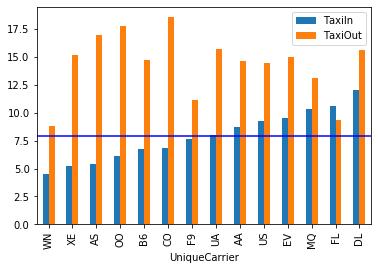

In [6]:
# To calculate the mean of All TaxiIn and TaxiOut
avg_all_in_out_df = sub_avg_df_1.mean()

# Using bar chart to show the mean of TaxiIn and TaxiOut which group by UniqueCarrier
sub_avg_df_1.plot.bar().axhline(y = avg_all_in_out_df['TaxiIn'], color = "blue")

# sub_avg_df_1.plot.bar().axhline(y = avg_all_in_out_df['TaxiOut'], color = "orange")

### 1_1) Brief sum-up
- 1) The summary statistics for the mean TaxiIn of carries is that there are 7 carries that their means of TaxiIn are larger than the mean of All, as evidenced by previous bar chart.
- 2) These carries are 'UA', 'AA', 'US', 'EV', 'MQ', 'FL' ,and 'DL'

### 1_2) Finding out FlightNums which belong to 'UA', 'AA', 'US', 'EV', 'MQ', 'FL' ,and 'DL'

- step1) Finding out carries that their means TaxiIn are large than the mean All TaxiIn
- step2) Finding out FlightNums of step1)'s carries
- step3) Finding out FlightNums that their TaxiIns are large than the mean All TaxiIn

In [7]:
# step1) Finding out carries that their means TaxiIn are large than the mean All TaxiIn
taxiin_lg_mean_carriers = sub_avg_df_1[sub_avg_df_1['TaxiIn'] >= avg_all_in_out_df['TaxiIn']].index
taxiin_lg_mean_carriers


Index(['UA', 'AA', 'US', 'EV', 'MQ', 'FL', 'DL'], dtype='object', name='UniqueCarrier')

In [8]:
# step2) Finding out FlightNums of step1)'s carries
sub_df_1_1 = hflights_df[hflights_df['UniqueCarrier']
                         .isin(taxiin_lg_mean_carriers.to_list())][['Year', 'Month', 'DayofMonth', 'UniqueCarrier','FlightNum', 'TaxiIn']]

# step3) Finding out FlightNums that their TaxiIns are large than the mean All TaxiIn
lt_flt_df = sub_df_1_1[sub_df_1_1['TaxiIn'] > avg_all_in_out_df['TaxiIn']]

# print
lt_flt_df

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,TaxiIn
3,2011,1,4,AA,428,9.0
4,2011,1,5,AA,428,9.0
6,2011,1,7,AA,428,12.0
8,2011,1,9,AA,428,8.0
10,2011,1,11,AA,428,8.0
...,...,...,...,...,...,...
19140,2011,2,13,AA,2185,9.0
19143,2011,2,16,AA,2185,10.0
19144,2011,2,17,AA,2185,16.0
19145,2011,2,18,AA,2185,9.0


### 1_2) Brief sum-up
To summary, in 'UA', 'AA', 'US', 'EV', 'MQ', 'FL' and 'DL', there are 971 FlightNums that their TaxiIn values are larger than the mean of all (7.8), as evidenced by pervious table. 

### 1_3) Finding out the top 30 of these FlightNums
- step1) finding out top 30 TaxiIn in 'UA', 'AA', 'US', 'EV', 'MQ', 'FL' and 'DL'
- step2) grouping by UniqueCarrier and counting flights, then showing as pie chart

In [9]:
# step1) finding out top 30 TaxiIn in 'UA', 'AA', 'US', 'EV', 'MQ', 'FL' and 'DL'
lt_flt_df_top30 = lt_flt_df.sort_values(by = 'TaxiIn', ascending=False).head(30)


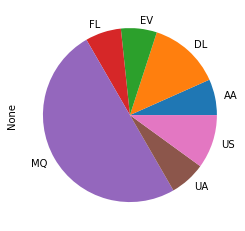

In [10]:
# step2) grouping by UniqueCarrier and counting flights, then showing as pie chart
pie_top30 = lt_flt_df_top30.groupby('UniqueCarrier').size()

pie_top30.plot.pie()

### 1_3) Brief sum-up
To summary, in top30 TaxiIn values, the MQ has the most delayed flights, as evidenced by pie chart.


# 1 Summarize
'UA', 'AA', 'US', 'EV', 'MQ', 'FL' ,and 'DL' have high probability of TaxiIn delay. Thees 7 carries have 971 FligntNums that have high TaxiIn value. Customers should choose other carries, if they do not like waiting on planes to take off.

# 1 ----------------------            end           --------------------------------

In [11]:
# sub_df_2 = hflights_df[['UniqueCarrier', 'TaxiIn', 'TaxiOut']]
sub_agg_df_2 = hflights_df.groupby(['UniqueCarrier', 'Origin']).mean()
sub_agg_df_2.head(5)

,,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
UniqueCarrier,Origin,,,,,,,,,,,,,,,,
AA,IAH,2011.0,1.473988,15.298651,3.984586,1241.401186,1429.554455,1236.379576,90.656746,67.303571,0.950397,5.610672,476.369942,8.720792,14.654150,0.026975,0.001927
AS,IAH,2011.0,1.474576,15.288136,4.033898,1832.949153,2041.644068,731.000000,289.672414,267.258621,9.396552,4.559322,1874.000000,5.423729,16.983051,0.000000,0.016949
B6,HOU,2011.0,1.490000,15.500000,3.980000,1153.925532,1594.478723,622.040000,194.000000,172.537634,11.086022,18.234043,1428.000000,6.723404,14.702128,0.060000,0.010000
CO,IAH,2011.0,1.112299,17.111127,4.122987,1429.993214,1647.357533,897.769107,167.018620,141.644894,5.366780,9.881251,1070.459736,6.845507,18.523753,0.007760,0.001464
DL,HOU,2011.0,1.000000,16.965517,4.022989,969.794872,1259.512821,1435.057471,115.871795,90.538462,3.615385,6.589744,696.000000,11.307692,14.025641,0.103448,0.000000


# 2 ------------------- start --------------------------------

# 2 Finding out the carries with the highest ArrDelay

- Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its 
- if ArrDelay is less than 15, the flight is on time. 

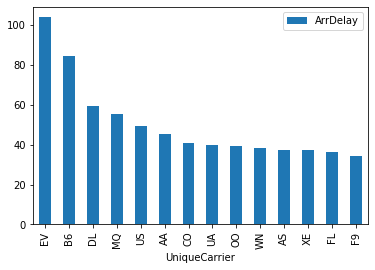

In [12]:
# To choose sub dataframe
arr_delay_df = hflights_df[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay']]

# To delete all rows which ArrDealy is NaN
no_nan_arr_delay_df = arr_delay_df.dropna()

# To find out all ArrDelay is large equal than 15
le_15_delay_df = no_nan_arr_delay_df[no_nan_arr_delay_df['ArrDelay'] >= 15] 

# To calculate mean of ArrDelay grouped by 'UniqueCarrier'
group_carrier_avg_df = le_15_delay_df[['UniqueCarrier', 'ArrDelay']].groupby('UniqueCarrier').mean().sort_values(by = 'ArrDelay', ascending=False)

# To show them as a bar chart.
group_carrier_avg_df.plot.bar()

### Image analysis 
- In the bar chart, the EV, B6 and DL have higher ArrDelay values than other carries.

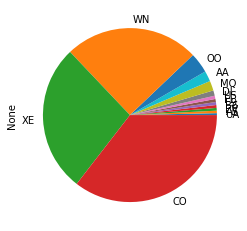

In [13]:
# To get the number of ArrDelay flights groubed by 'UniqueCarrier'
pie_carrier_size_df = le_15_delay_df[['UniqueCarrier', 'ArrDelay']].groupby('UniqueCarrier').size()

# # To show them as a pie chart.
pie_carrier_size_df.sort_values().plot.pie()

### Image analysis
- In this pie chart, the CO, XE and WN account for over 80% areas. It means that the 3 carries has more ArrDelay flights than other carries.

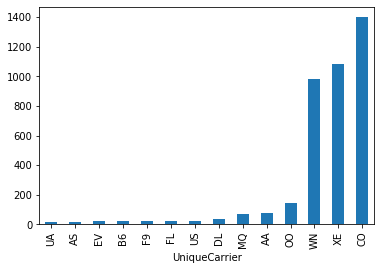

In [14]:
# bar chart can see count values.
pie_carrier_size_df.sort_values().plot.bar()

### Image analysis
- In this bar chart, the CO, XE and WN have over 1000, 1100 and 1400 arrdelay flights, respectively.

- How to agg a value and rename a column

- method 1
```python
gb = df.groupby(['col1', 'col2'])
counts = gb.size().to_frame(name='counts')
 (counts
  .join(gb.agg({'col3': 'mean'}).rename(columns={'col3': 'col3_mean'}))
  .join(gb.agg({'col4': 'median'}).rename(columns={'col4': 'col4_median'}))
  .join(gb.agg({'col4': 'min'}).rename(columns={'col4': 'col4_min'}))
  .reset_index()
 ) 
```


Sample 1

gb = le_15_delay_df.groupby(['UniqueCarrier'])
counts = gb.size().to_frame(name='counts')
(counts.join(gb.agg({'ArrDelay': 'mean'}).rename(columns={'ArrDelay': 'ArrDelay_mean'})).join(gb.agg({'ArrDelay': 'median'}).rename(columns={'ArrDelay': 'ArrDelay_median'})).reset_index())



Sample 2

df.groupby(['UniqueCarrier']).agg({'ArrDelay': ['mean', 'count']})

Sample 3

gp_flt_avg_df = le_15_delay_df.groupby(['UniqueCarrier', 'FlightNum']).agg({'ArrDelay': ['mean', 'min', 'count'], 'DepDelay': ['median', 'min', 'count']})
gp_flt_avg_df

In [15]:
# le_15_delay_df.groupby(['UniqueCarrier']).agg({'ArrDelay': ['mean', 'count'], 'DepDelay': ['median', 'min', 'count']})

# To use agg() to calculate mean and count for each carrier
tb_ad = le_15_delay_df.groupby(['UniqueCarrier']).agg({'ArrDelay': ['mean', 'count']})

# there are combine columns ('ArrDelay',  'mean') and ('ArrDelay',  'count')
tb_ad.sort_values(by=[('ArrDelay',  'mean')])

ArrDelay      
                     mean count
UniqueCarrier                  
F9              34.090909    22
FL              36.500000    22
XE              37.321924  1081
AS              37.444444    18
WN              38.383130   984
OO              39.290541   148
UA              39.928571    14
CO              40.788269  1398
AA              45.519481    77
US              49.541667    24
MQ              55.430556    72
DL              59.384615    39
B6              84.619048    21
EV             103.900000    20

### Table analysis
- In this table, EV has the highest mean of ArrDelay value, and the CO has the highest count of ArrDelay flights.

# 2 Summarize

The EV, B6 and DL have higher ArrDelay values than other carries. But the CO, XE and WN account for over 80% areas. It means that the 3 carries has more ArrDelay flights than other carries. EV has the highest mean of ArrDelay value. In contrast, the CO has the highest count of ArrDelay flights. The evidences demostrated by pervious charts and tables. Customers should not choose CO, XE and WN.

# 2 ------------------- end --------------------------------

# 3 ------------------- start --------------------------------

# 3 Find out the daily number of flight pattern
- step1) Create a new column. Value is MM/DD/YYYY that combines with Year, Month, and DayofMonth.
- step2) To count the number of flights grouped by MM/DD/YYYY

In [16]:
# create a new colomn. Name is Date_MDY. Value isfor MM/DD/YYYY.
sub_df_3 = hflights_df[['Year', 'Month', 'DayofMonth']]
sub_df_3['Date_MDY'] = sub_df_3.apply(lambda x: datetime(x['Year'], x['Month'], x['DayofMonth'], 0, 0).strftime('%m/%d/%Y'), axis=1)

D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
sub_df_3.head(5)

,Year,Month,DayofMonth,Date_MDY
0,2011,1,1,01/01/2011
1,2011,1,2,01/02/2011
2,2011,1,3,01/03/2011
3,2011,1,4,01/04/2011
4,2011,1,5,01/05/2011


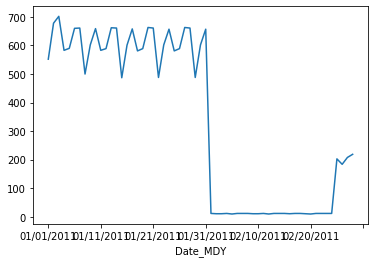

In [18]:
# count number of flight grouped by Date_MDY
plot_gp_ymd_size_df = sub_df_3.groupby('Date_MDY').size()

# draw a line chart
plot_gp_ymd_size_df.plot()

In [19]:
plot_gp_ymd_size_df = sub_df_3[(sub_df_3['Month'] == 1) & (sub_df_3['DayofMonth'] <= 31)].groupby('Date_MDY').size().to_frame(name='counts')

plot_gp_ymd_size_df[plot_gp_ymd_size_df['counts'] < 550]

,counts
Date_MDY,
01/08/2011,500
01/15/2011,487
01/22/2011,488
01/29/2011,488


# Summarize
- In this line chart, In Jan. 2011, the number of flights dropped to around 500 each weekend. In the first 20 days of February 2011, the number of flights dropped to around 20, but it rose rapidly to more than over in the remaning days of February. The evidences demostrated by pervious charts and tables.  

- Customers should book tickets in advance if they want to travel on weekends because the number of flight is less than the weekdays in January.

# 3 ------------------- end --------------------------------

# 4 ------------------- start --------------------------------

# 4 Finding out where is the popular destination
- Customer can choose the popular destination as their tourist destination.


### step1) Finding out where is the largest number of flights of origin.
### step2) Which carrier hasthe largest number of flights.
### step3.1) Finding out the popular destination from HOU
### step3.2) Finding out the popular destination from IAH



In [20]:
# To get sub dataframe
sub_df_3 = hflights_df[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest']]
sub_df_3.head(5)

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,Origin,Dest
0,2011,1,1,AA,428,IAH,DFW
1,2011,1,2,AA,428,IAH,DFW
2,2011,1,3,AA,428,IAH,DFW
3,2011,1,4,AA,428,IAH,DFW
4,2011,1,5,AA,428,IAH,DFW


Origin
HOU     4319
IAH    15681
dtype: int64


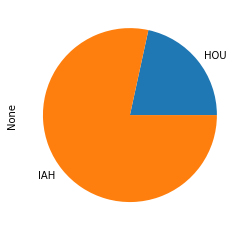

In [21]:
# To calculate the count of Origin
gb_ori_df = sub_df_3.groupby(['Origin']).size()

print(gb_ori_df)

# To show a pie chart
gb_ori_df.plot.pie()

### Chart analysis
- In this pie chart, the number of flight from IAH is 3 times than the number of flight from HOU. 

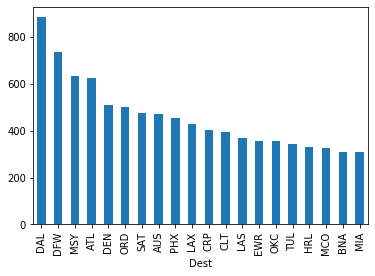

In [22]:
# To calculate the number of flights to Dest
gb_des_df = sub_df_3.groupby(['Dest']).size()

# To show a bar chart
gb_des_df.sort_values(ascending = False).head(20).plot.bar() # top 20 destinations

### Chart analysis
- In this bar chart, DAL, DFW and MSY are the top three most popular destinations, as evidence by this bar chart.

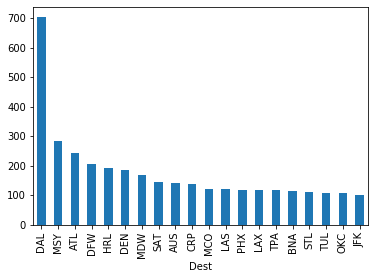

In [23]:
# To calculate the number of flights from HOU, and to group by Dest
gb_des_df = sub_df_3[sub_df_3['Origin'] == 'HOU'].groupby(['Dest']).size()

# To show a bar chart
gb_des_df.sort_values(ascending=False).head(20).plot.bar() # from HOU to top 20 destinations

### Chart analysis
- Taking off from HOU, DAL, MSY and ATL are the top three most popular destinations , as evidence by this bar chart.

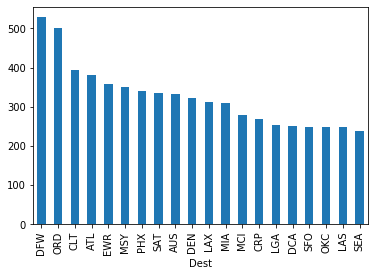

In [24]:
# To calculate the number of flights from HOU, and to group by Dest
gb_des_df = sub_df_3[sub_df_3['Origin'] == 'IAH'].groupby(['Dest']).size()

# To show a bar chart
gb_des_df.sort_values(ascending=False).head(20).plot.bar() # from IAH to top 20 destinations

### Chart analysis
- Taking off from IAH, DFW, ORD and CLT are the top three most popular destinations , as evidence by this bar chart.

# Summarize
- The number of flight taking off IAH is 3 times than the number of flight taking off HOU. 
- DAL, DFW and MSY are the top three most popular destinations。
- Taking off from HOU, the top three most popular destinations are DAL, DFW and MSY. In contrast, DAL, MSY and ATL are the top three most popular destinations, which taked off from IAH
- Customers can go to DAL and MSY as tourist destinations.

# 4 ------------------- end --------------------------------